In [183]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [184]:
df = pd.read_csv('dataset.csv')
df.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),Overview of motor examination: Hoehn & Yahr scale (-),Overview of motor examination: UPDRS III total (-),18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,0,0.0,1.5,8,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,0,0.0,2.5,22,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,0,0.0,2,19,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,0,0.0,2,24,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,0,0.0,2.5,54,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [185]:
# only interested in these columns
df_cols = df[[' Participant  code ',' Entropy  of  speech  timing  (-) ',
       ' Rate  of  speech  timing  (-/min) ',
       ' Acceleration  of  speech  timing  (-/min2) ',
       ' Duration  of  pause  intervals  (ms) ',
       ' Duration  of  voiced  intervals  (ms) ',
       ' Gaping  in-between  voiced  intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) ',
       ' Decay  of  unvoiced  fricatives  (‰/min) ',
       ' Relative  loudness  of  respiration  (dB) ',
       ' Pause  intervals  per  respiration  (-) ',
       ' Rate  of  speech  respiration  (-/min) ',
       ' Latency  of  respiratory  exchange  (ms) ',
       ' Entropy  of  speech  timing  (-) .1',
       ' Rate  of  speech  timing  (-/min) .1',
       ' Acceleration  of  speech  timing  (-/min2) .1',
       ' Duration  of  pause  intervals  (ms) .1',
       ' Duration  of  voiced  intervals  (ms) .1',
       ' Gaping  in-between  voiced  Intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) .1',
       ' Decay  of  unvoiced  fricatives  (‰/min) .1',
       ' Relative  loudness  of  respiration  (dB) .1',
       ' Pause  intervals  per  respiration  (-) .1',
       ' Rate  of  speech  respiration  (-/min) .1',
       ' Latency  of  respiratory  exchange  (ms) .1']].copy()

In [186]:
"""df_cols.head()
df_cols[' Positive  history  of  Parkinson  disease  in  family '].unique() 
# notice we have some '-' values so investigate to see how many and what to do...
"""

"df_cols.head()\ndf_cols[' Positive  history  of  Parkinson  disease  in  family '].unique() \n# notice we have some '-' values so investigate to see how many and what to do...\n"

In [187]:
"""
history = df_cols[' Positive  history  of  Parkinson  disease  in  family '].values
plt.hist(history) # there are only a few so just drop those rows.
"""

"\nhistory = df_cols[' Positive  history  of  Parkinson  disease  in  family '].values\nplt.hist(history) # there are only a few so just drop those rows.\n"

In [188]:
"""
#df_cols = df_cols[df_cols[' Positive  history  of  Parkinson  disease  in  family '] != '-']
df_cols[' Positive  history  of  Parkinson  disease  in  family '] = df_cols[' Positive  history  of  Parkinson  disease  in  family '].replace(['-'],'No')
"""

"\n#df_cols = df_cols[df_cols[' Positive  history  of  Parkinson  disease  in  family '] != '-']\ndf_cols[' Positive  history  of  Parkinson  disease  in  family '] = df_cols[' Positive  history  of  Parkinson  disease  in  family '].replace(['-'],'No')\n"

In [189]:
"""
# Binarize the gender and positive history columns
le = preprocessing.LabelEncoder()
le.fit(df_cols['Gender'].values)
df_cols['Gender'] = le.transform(df_cols['Gender'].values)

le.fit(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)
df_cols[' Positive  history  of  Parkinson  disease  in  family '] = le.transform(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)

# Gender: 0 = female, 1 = male
# Family History: 1 = no, 2 = Yes, 0 = '-'
"""

"\n# Binarize the gender and positive history columns\nle = preprocessing.LabelEncoder()\nle.fit(df_cols['Gender'].values)\ndf_cols['Gender'] = le.transform(df_cols['Gender'].values)\n\nle.fit(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)\ndf_cols[' Positive  history  of  Parkinson  disease  in  family '] = le.transform(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)\n\n# Gender: 0 = female, 1 = male\n# Family History: 1 = no, 2 = Yes, 0 = '-'\n"

In [190]:
def filter_participants(df_in, part_code):
    """
    To filter the dataframe into only PDxx (Parkinson's), HCxx (Healthy Control), RBDxx (REM Sleep Beh. Dis.) 
    
    df = all data df.
    part_code = first 2 letters of participant code (string)
    """
    df_out = df_in[df_in[' Participant  code '].str.startswith(part_code)].copy()
    return df_out

In [191]:
#df[' Participant  code '].unique()

In [192]:
df_park = filter_participants(df_cols, "PD")
df_park.drop([' Participant  code '], axis=1, inplace=True)
#df_park[' Participant  code '] = 'PD'
df_park.head()

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [193]:
df_RBD = filter_participants(df_cols, "RBD")
df_RBD.drop([' Participant  code '], axis=1, inplace=True)
#df_RBD[' Participant  code '] = 'RBD'
df_RBD.head()

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
30,1.568,377,17.85,132,249,69.43,23.50,0.584,-18.17,5.50,22.66,84,1.575,340,3.62,140,308,67.80,22.38,0.238,-15.69,9.0,9.58,81
31,1.564,359,37.62,135,264,61.22,38.12,0.073,-24.73,7.50,15.16,117,1.568,286,-1.89,221,322,50.47,22.38,-0.449,-15.73,4.5,18.02,266
32,1.550,336,1.68,126,286,52.24,24.63,-2.129,-23.83,5.00,20.00,113,1.562,334,-4.89,221,239,55.20,22.38,0.445,-20.16,4.5,16.23,191
33,1.551,358,16.54,111,261,69.57,38.13,-0.893,-18.81,6.25,20.63,88,1.555,273,7.01,167,364,40.98,22.38,0.466,-17.91,4.0,17.52,58
34,1.563,278,9.32,227,294,56.14,35.87,-2.129,-26.61,3.75,21.34,167,1.559,298,7.15,179,299,53.20,31.37,-0.034,-19.99,4.0,20.96,97


In [194]:
df_control = filter_participants(df_cols, "HC")
#df_control[' Participant  code '] = 'HC'
df_control.drop([' Participant  code '], axis=1, inplace=True)
df_control.head()

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
80,1.546,249,25.80,185,366,43.86,34.75,-0.078,-26.25,4.50,22.24,118,1.539,241,3.69,269,381,27.91,29.13,0.335,-25.79,2.0,18.49,128
81,1.555,339,15.63,157,263,43.42,30.25,-0.761,-28.50,4.25,23.44,143,1.548,335,-0.12,215,274,31.49,22.38,0.338,-24.61,6.0,13.72,260
82,1.524,319,12.82,149,290,34.35,49.38,2.341,-22.96,4.00,15.56,117,1.558,342,-1.28,199,242,72.96,17.88,0.135,-18.61,3.0,24.95,150
83,1.546,392,-9.40,109,245,43.72,22.38,-4.831,-18.25,8.00,9.94,57,1.542,347,11.65,226,258,32.87,22.38,-0.448,-23.69,3.0,18.23,116
84,1.558,417,40.07,117,229,59.33,28.00,-0.302,-16.28,10.00,8.87,138,1.557,294,-6.10,219,305,35.46,31.37,-0.406,-12.46,5.0,13.89,58


In [195]:
scaler = preprocessing.StandardScaler()

In [196]:
#df_park_scl = pd.DataFrame(scaler.fit_transform(df_park.values), columns = df_park.columns)
#df_RBD_scl =  pd.DataFrame(scaler.fit_transform(df_RBD.values), columns = df_RBD.columns)
#df_control_scl =  pd.DataFrame(scaler.fit_transform(df_control.values), columns = df_control.columns)


In [197]:
df_park['parkinsons'] = 'yes' #PD
df_RBD['parkinsons'] = 'no' # RBD
df_control['parkinsons'] = 'no' # HC

In [198]:
final_df = pd.concat([df_park, df_RBD, df_control])
final_df

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,parkinsons
0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127,yes
1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313,yes
2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201,yes
3,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151,yes
4,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.564,265,3.58,198,365,40.25,26.88,-1.872,-28.04,6.5,10.24,158,1.554,254,8.43,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177,no
126,1.547,291,6.31,183,359,39.59,31.37,-1.517,-22.87,5.0,13.46,224,1.569,300,4.09,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138,no
127,1.540,298,-13.66,177,283,53.01,50.50,-1.111,-22.91,4.5,19.11,251,1.537,246,5.09,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156,no
128,1.560,359,-2.44,169,256,50.68,17.88,-0.823,-23.82,6.5,18.14,226,1.561,262,2.80,252,361,38.92,26.88,0.389,-17.53,4.0,17.51,154,no


In [199]:
final_df.iloc[:,:-1] = pd.DataFrame(scaler.fit_transform(final_df.iloc[:,:-1].values), columns = final_df.iloc[:,:-1].columns)

In [200]:
final_df.head() # finally! :D

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,parkinsons
0,0.651886,0.566139,-0.403129,-0.445840,-0.423163,0.346530,0.089869,-0.178231,-0.064241,-0.444838,0.596968,0.512796,0.625076,0.847663,-0.881266,-0.895194,-0.046626,0.314284,-0.727826,0.918717,0.080062,0.864238,-0.897053,-0.214423,yes
1,0.651886,0.269543,1.370556,0.137207,-0.637062,-0.321809,-0.966776,-0.050858,-0.709701,0.593383,-0.550862,0.449428,1.000931,-0.063363,1.328958,0.830470,-0.788832,-0.363137,-0.135680,-1.476150,-0.982046,-0.256470,1.066252,1.976929,yes
2,-0.059404,-2.463372,0.085936,4.542448,0.704673,-0.368123,0.881178,1.524128,1.634656,-1.067770,0.522536,3.760425,-0.427318,-0.784592,0.628987,0.641529,-0.060370,0.311077,-0.727826,-1.696485,2.052114,-0.256470,1.251237,0.657405,yes
3,-1.634405,-3.967534,-1.108637,4.175345,7.335567,-2.543600,1.674836,0.239308,-0.998940,-1.898346,0.120991,-0.247624,-1.254200,-3.346853,-2.138808,2.115271,6.578256,-2.116413,2.817176,1.262778,-1.535925,-1.377178,-0.758931,0.068332,yes
4,-0.415050,-1.234619,-0.347779,0.957791,0.821345,-0.666592,1.937823,0.225355,-0.106866,-0.237193,-0.358904,-0.897150,0.324392,-1.107247,2.044975,-0.290582,2.179994,-0.925917,-0.136993,0.049243,-0.695977,0.303884,-0.699736,0.068332,yes


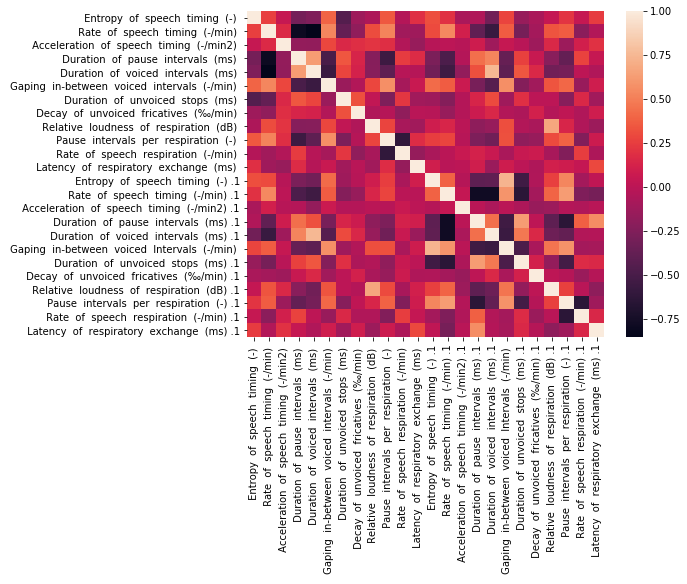

In [201]:
plt.figure(figsize=(8,6))

corr_mat = sns.heatmap(final_df.corr())

(array([0.29000596, 0.09826728, 0.08094975, 0.07530047, 0.06877929,
       0.05499734, 0.04846556, 0.04077125, 0.03834511, 0.03020356,
       0.02811729, 0.02661318, 0.02342777, 0.01735106, 0.01481407]), array([0.29000596, 0.38827325, 0.469223  , 0.54452346, 0.61330275,
       0.66830009, 0.71676565, 0.7575369 , 0.79588201, 0.82608557,
       0.85420286, 0.88081604, 0.90424381, 0.92159487, 0.93640894]))


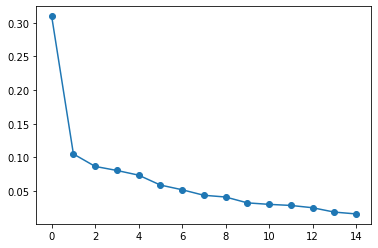

In [202]:
# Find optimal # of components

def scree_plot(data, max_comps):
    pca = PCA(n_components = max_comps)
    pca.fit(data)
    exp_var = pca.explained_variance_ratio_
    
    fig = plt.figure()
    plt.plot([exp_var[i]/sum(exp_var) for i in range(0, len(exp_var))], marker='o')
    return exp_var, (np.cumsum(exp_var))
    
print(scree_plot(final_df.iloc[:,:-1], 15))



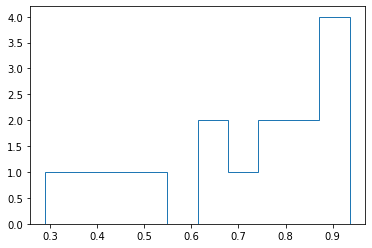

In [203]:
#for fun also plot the cumulative variance explained by all the components
def cum_var_exp(data, max_comps):
    pca = PCA(n_components = max_comps)
    pca.fit(data)
    exp_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(exp_var)
    plt.hist(cum_var_exp, histtype='step')

cum_var_exp(final_df.iloc[:,:-1], 15)

In [204]:
# Looks like 3 PC's would be good... let's do it! 

PCA2 = PCA(n_components = 3)
pca_df = pd.DataFrame(PCA2.fit_transform(final_df.iloc[:,:-1]), columns = ['PC1', 'PC2', 'PC3'])

In [205]:
pca_df['parkinsons'] = final_df['parkinsons'].values

In [206]:
X_pca = pca_df.iloc[:,:-1]
X_pca

,PC1,PC2,PC3
0,-1.629958,-1.090195,-0.743661
1,-0.303385,2.920301,-0.831332
2,2.466929,-0.031528,0.712416
3,11.882216,-2.951941,-1.874898
4,2.430228,-1.501432,-0.195700
...,...,...,...
125,2.170087,0.270125,-2.602556
126,0.244098,-1.206973,-1.271975
127,2.284747,-0.233239,0.655730
128,-0.205026,0.776575,-1.340968


In [207]:
pca_df['parkinsons'].unique()

array(['yes', 'no'], dtype=object)

(130, 4)

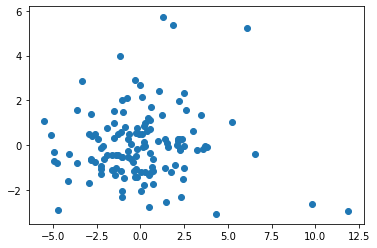

In [208]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
pca_df.shape

[(0.7058823529411765, 0.7673202614379085, 0.873202614379085), (0.1437908496732026, 0.5450980392156862, 0.6823529411764706)]


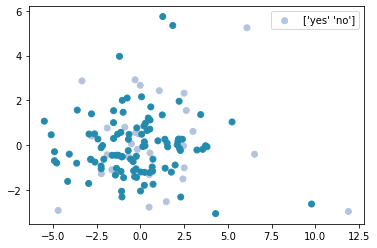

In [209]:
color_labels = pca_df['parkinsons'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("PuBuGn", len(color_labels))
print(rgb_values)



# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['parkinsons'].map(color_map), label=pca_df['parkinsons'].unique())
plt.legend()

[[0.096379, 0.025165, 0.547103], [0.67916, 0.151848, 0.575189], [0.951726, 0.941671, 0.152925]]


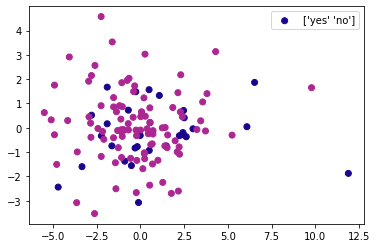

In [210]:
cmap = plt.get_cmap('plasma')
rgb_cm = cmap.colors
len(rgb_cm)
color_labels = pca_df['parkinsons'].unique()

# List of RGB triplets
rgb_values = [rgb_cm[4], rgb_cm[99], rgb_cm[250]]
print(rgb_values)



# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['parkinsons'].map(color_map), label=pca_df['parkinsons'].unique())
plt.legend()

In [211]:
# It's possible that the data is nonlinearly separable. Lets see if t-SNE fares any better

In [212]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(final_df.iloc[:,:-1].values)

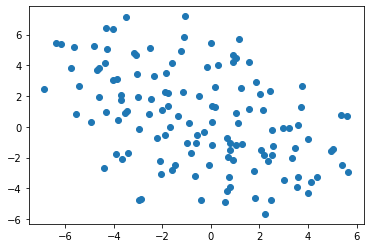

,tsne1,tsne2,parkinsons
0,1.013979,-1.189889,yes
1,1.048480,4.501230,yes
2,-6.866446,2.443833,yes
3,-6.389712,5.488533,yes
4,-4.040203,3.019099,yes
...,...,...,...
125,-3.716454,2.099179,no
126,-2.540915,0.830556,no
127,-3.068574,3.416662,no
128,-0.491202,2.014163,no


In [213]:

X_tsne=pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
X_tsne['parkinsons'] = final_df['parkinsons'].values


plt.scatter(X_tsne['tsne1'], X_tsne['tsne2'])
plt.show()

X_tsne

[(0.7058823529411765, 0.7673202614379085, 0.873202614379085), (0.1437908496732026, 0.5450980392156862, 0.6823529411764706)]


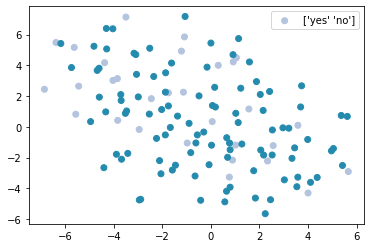

In [214]:
color_labels = X_tsne['parkinsons'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("PuBuGn", len(color_labels))
print(rgb_values)



# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(X_tsne['tsne1'], X_tsne['tsne2'], c=X_tsne['parkinsons'].map(color_map), label=X_tsne['parkinsons'].unique())
plt.legend()

In [215]:
X_df = final_df.iloc[:,:-1].copy()
X_df.values.shape
X_df.values

array([[ 0.65188606,  0.56613871, -0.40312876, ...,  0.86423819,
        -0.89705293, -0.21442254],
       [ 0.65188606,  0.2695433 ,  1.37055643, ..., -0.25646969,
         1.06625235,  1.97692871],
       [-0.05940448, -2.46337153,  0.08593581, ..., -0.25646969,
         1.25123715,  0.65740537],
       ...,
       [-0.56746916, -0.62024292, -2.03141637, ..., -0.81682362,
         0.50883151,  0.12723975],
       [ 0.44866019,  0.67206564, -1.10450683, ..., -0.25646969,
         0.01553872,  0.10367683],
       [ 0.04220845, -1.34054605, -0.36677936, ..., -0.25646969,
        -0.84032426, -0.17907817]])

In [216]:
y_df = final_df.iloc[:,-1].copy()
y_df

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
125     no
126     no
127     no
128     no
129     no
Name: parkinsons, Length: 130, dtype: object

In [217]:
# Logistic regression - predict category (PD/RBD/HC)

X_vals = final_df.iloc[:,:-1]
y_vals = final_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X_vals,y_vals)


lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


y_hat = lr_model.predict(x_test)
y_hat_prob = lr_model.predict_proba(x_test)

acc = accuracy_score(y_test, y_hat)
ll = log_loss(y_test, y_hat_prob)

print("Accuracy: {}\nLog Loss: {}".format(acc, ll))

Accuracy: 0.7878787878787878
Log Loss: 0.6157070561458338


In [231]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

for n in range(-5, 5):
    lr_model.C = 10**n
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(lr_model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

    print(lr_model.C, scores, np.mean(scores))

lr_model.C = 10**-5
final_y_hat = lr_model.predict(x_test)
final_y_hat_prob = lr_model.predict_proba(x_test)

acc_lr = accuracy_score(y_test, final_y_hat)
ll_lr = log_loss(y_test, final_y_hat_prob)

logreg_results = ['LogReg', acc_lr, ll_lr]

1e-05 [0.57142857 0.57142857 1.         0.66666667 0.83333333] 0.7285714285714285
0.0001 [0.71428571 0.71428571 0.85714286 0.83333333 0.5       ] 0.7238095238095238
0.001 [0.71428571 0.71428571 0.57142857 0.83333333 0.83333333] 0.7333333333333334
0.01 [0.71428571 0.42857143 0.85714286 0.83333333 0.83333333] 0.7333333333333334
0.1 [1.         0.57142857 0.71428571 0.83333333 0.66666667] 0.7571428571428571
1 [0.85714286 0.71428571 0.57142857 0.66666667 0.83333333] 0.7285714285714285
10 [0.42857143 0.85714286 0.42857143 0.83333333 0.83333333] 0.6761904761904762
100 [0.71428571 0.57142857 0.85714286 0.33333333 0.66666667] 0.6285714285714286
1000 [0.57142857 0.71428571 0.42857143 0.83333333 0.83333333] 0.6761904761904762
10000 [0.71428571 0.57142857 0.71428571 0.5        0.83333333] 0.6666666666666667


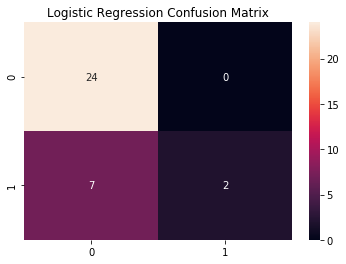

In [220]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, final_y_hat)


fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()


In [244]:
# SVM 

from sklearn.svm import SVC

my_svm = SVC()
my_svm.fit(x_train, y_train)
for n in range(-5, 5):
    my_svm.C = 10**n
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(my_svm, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

    print(my_svm.C, scores, np.mean(scores))
    
# seems like c=100 is the best (10^2)

my_svm.C =  10**2
yhat_svm = my_svm.predict(x_test)

acc_svm = accuracy_score(y_test, yhat_svm)


svm_results = ['SVM', acc_svm, '']

1e-05 [0.42857143 0.85714286 0.57142857 0.83333333 1.        ] 0.738095238095238
0.0001 [0.57142857 0.57142857 0.85714286 0.66666667 1.        ] 0.7333333333333333
0.001 [0.57142857 0.71428571 0.71428571 0.83333333 0.83333333] 0.7333333333333334
0.01 [0.42857143 0.71428571 1.         0.83333333 0.66666667] 0.7285714285714285
0.1 [0.57142857 0.71428571 0.71428571 0.83333333 0.83333333] 0.7333333333333334
1 [0.85714286 0.85714286 0.71428571 0.83333333 0.33333333] 0.719047619047619
10 [0.71428571 0.57142857 0.85714286 1.         0.5       ] 0.7285714285714285
100 [0.85714286 0.57142857 0.71428571 0.66666667 0.66666667] 0.6952380952380952
1000 [0.85714286 0.85714286 0.85714286 0.66666667 0.33333333] 0.7142857142857142
10000 [0.42857143 0.85714286 0.71428571 0.83333333 0.83333333] 0.7333333333333334


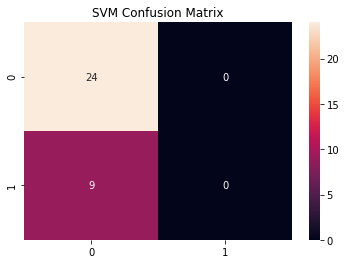

In [245]:
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm)


fig, ax = plt.subplots()
sns.heatmap(cnf_matrix_svm, annot=True, ax=ax)
ax.set_title('SVM Confusion Matrix')
plt.show()

# Results summary


In [258]:
results_df = pd.DataFrame([svm_results, logreg_results], columns=['Method','Accuracy','Log Loss'])
results_df.set_index('Method')


,Accuracy,Log Loss
Method,,
SVM,0.727273,
LogReg,0.787879,0.615707


# Deep learning model

In [259]:
final_df

,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,parkinsons
0,0.651886,0.566139,-0.403129,-0.445840,-0.423163,0.346530,0.089869,-0.178231,-0.064241,-0.444838,0.596968,0.512796,0.625076,0.847663,-0.881266,-0.895194,-0.046626,0.314284,-0.727826,0.918717,0.080062,0.864238,-0.897053,-0.214423,yes
1,0.651886,0.269543,1.370556,0.137207,-0.637062,-0.321809,-0.966776,-0.050858,-0.709701,0.593383,-0.550862,0.449428,1.000931,-0.063363,1.328958,0.830470,-0.788832,-0.363137,-0.135680,-1.476150,-0.982046,-0.256470,1.066252,1.976929,yes
2,-0.059404,-2.463372,0.085936,4.542448,0.704673,-0.368123,0.881178,1.524128,1.634656,-1.067770,0.522536,3.760425,-0.427318,-0.784592,0.628987,0.641529,-0.060370,0.311077,-0.727826,-1.696485,2.052114,-0.256470,1.251237,0.657405,yes
3,-1.634405,-3.967534,-1.108637,4.175345,7.335567,-2.543600,1.674836,0.239308,-0.998940,-1.898346,0.120991,-0.247624,-1.254200,-3.346853,-2.138808,2.115271,6.578256,-2.116413,2.817176,1.262778,-1.535925,-1.377178,-0.758931,0.068332,yes
4,-0.415050,-1.234619,-0.347779,0.957791,0.821345,-0.666592,1.937823,0.225355,-0.106866,-0.237193,-0.358904,-0.897150,0.324392,-1.107247,2.044975,-0.290582,2.179994,-0.925917,-0.136993,0.049243,-0.695977,0.303884,-0.699736,0.068332,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.651886,-1.319361,-0.607181,0.677065,1.540827,-0.837053,-0.438453,-0.096297,-1.760094,0.385739,-1.538075,0.370218,-0.126634,-0.651734,1.375088,0.439991,0.805537,-0.699843,-0.135680,-0.038891,-0.939440,-0.816824,-0.502419,0.374650,no
126,-0.211824,-0.768541,-0.381650,0.353150,1.424154,-0.879508,0.088695,0.030718,-0.186026,-0.237193,-0.907356,1.415796,1.000931,0.221333,0.504637,-0.655869,0.516901,0.157956,-0.727826,-0.276174,0.414824,0.303884,-0.125050,-0.084826,no
127,-0.567469,-0.620243,-2.031416,0.223584,-0.053699,-0.016264,2.334652,0.175980,-0.198205,-0.444838,0.199341,1.843532,-1.404542,-0.803572,0.705201,-0.076449,0.956728,-0.589211,1.635509,0.618723,1.361287,-0.816824,0.508832,0.127240,no
128,0.448660,0.672066,-1.104507,0.050830,-0.578726,-0.166142,-1.495098,0.279023,-0.475265,0.385739,0.009342,1.447480,0.399563,-0.499896,0.245908,0.288838,0.544391,-0.494613,-0.135680,0.581436,0.761759,-0.256470,0.015539,0.103677,no


In [265]:
#y_df=pd.DataFrame(y_df)

#y_df
y_labels = final_df['parkinsons'].values
y_labels
type(y_labels)

numpy.ndarray

In [267]:
le = preprocessing.LabelEncoder()
le.fit(y_labels)
#y_enc['parkinsons'] = le.transform(y_df['parkinsons'])
y_labels = le.transform(y_labels)
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [268]:
#x_train, x_test, y_train, y_test = train_test_split(X_df,y_df)
y_df

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
125     no
126     no
127     no
128     no
129     no
Name: parkinsons, Length: 130, dtype: object

In [269]:
X_df.shape

(130, 24)

In [270]:
model = tf.keras.Sequential()
model.add(Input(shape=(24,))) # the shape of the X_df (of all the info...)

model.add(Dense(50, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(5, activation="softmax"))
#model.add(tf.keras.layers.Conv2D(50, 5, strides=3, activation="relu"))
#model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
#model.add(tf.keras.layers.MaxPooling2D(3))

model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                1250      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 155       
Total params: 2,935
Trainable params: 2,935
Non-trainable params: 0
_________________________________________________________________


In [272]:

# finding a good learing rate
for lr in range(-6, 1):
    print("Learning rate: {}".format(10**lr))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=10**lr),     #tf.keras.optimizers.RMSprop(),  # Optimizer
        # Loss function to minimize
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        # List of metrics to monitor
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )

    print("Fit model on training data")
    history = model.fit(
        X_df,y_labels,
        batch_size=16,
        epochs=30,
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
        validation_split=0.2,
    )
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

Learning rate: 1e-06
Fit model on training data
Epoch 1/30
7/7 [==============================] - 0s 22ms/step - loss: 1.9293 - sparse_categorical_accuracy: 0.1154 - val_loss: 2.0550 - val_sparse_categorical_accuracy: 0.0385
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9287 - sparse_categorical_accuracy: 0.1154 - val_loss: 2.0546 - val_sparse_categorical_accuracy: 0.0385
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9283 - sparse_categorical_accuracy: 0.1154 - val_loss: 2.0542 - val_sparse_categorical_accuracy: 0.0385
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9280 - sparse_categorical_accuracy: 0.1154 - val_loss: 2.0538 - val_sparse_categorical_accuracy: 0.0385
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9276 - sparse_categorical_accuracy: 0.1154 - val_loss: 2.0534 - val_sparse_categorical_accuracy: 0.0385
Epoch 6/30
7/7 [==============================] - 0s 4ms/step - loss: 1

7/7 [==============================] - 0s 3ms/step - loss: 1.8633 - sparse_categorical_accuracy: 0.1250 - val_loss: 1.9812 - val_sparse_categorical_accuracy: 0.0385
Epoch 17/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8602 - sparse_categorical_accuracy: 0.1154 - val_loss: 1.9777 - val_sparse_categorical_accuracy: 0.0385
Epoch 18/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8569 - sparse_categorical_accuracy: 0.1154 - val_loss: 1.9741 - val_sparse_categorical_accuracy: 0.0385
Epoch 19/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8537 - sparse_categorical_accuracy: 0.1250 - val_loss: 1.9707 - val_sparse_categorical_accuracy: 0.0385
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8506 - sparse_categorical_accuracy: 0.1250 - val_loss: 1.9674 - val_sparse_categorical_accuracy: 0.0385
Epoch 21/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8475 - sparse_categorical_accuracy: 0.1250 - val_loss:

7/7 [==============================] - 0s 16ms/step - loss: 0.9945 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.7650 - val_sparse_categorical_accuracy: 0.9615
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8275 - sparse_categorical_accuracy: 0.7115 - val_loss: 0.6483 - val_sparse_categorical_accuracy: 0.9615
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7448 - sparse_categorical_accuracy: 0.7308 - val_loss: 0.5645 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6810 - sparse_categorical_accuracy: 0.7404 - val_loss: 0.5076 - val_sparse_categorical_accuracy: 0.9615
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6334 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.4591 - val_sparse_categorical_accuracy: 0.9615
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5997 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.4

Epoch 17/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6548 - val_sparse_categorical_accuracy: 0.8462
Epoch 18/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.7493 - val_sparse_categorical_accuracy: 0.8462
Epoch 19/30
7/7 [==============================] - 0s 3ms/step - loss: 7.2038e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.7194 - val_sparse_categorical_accuracy: 0.8462
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 5.1563e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.7801 - val_sparse_categorical_accuracy: 0.8462
Epoch 21/30
7/7 [==============================] - 0s 3ms/step - loss: 3.7240e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.9273 - val_sparse_categorical_accuracy: 0.8462
Epoch 22/30
7/7 [==============================] - 0s 3ms/step - loss: 2.5696e-04 - sparse_categorical_

7/7 [==============================] - 0s 3ms/step - loss: 1429.3130 - sparse_categorical_accuracy: 0.6250 - val_loss: 29.1798 - val_sparse_categorical_accuracy: 0.9615
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 76.1842 - sparse_categorical_accuracy: 0.7308 - val_loss: 12.3650 - val_sparse_categorical_accuracy: 0.1154
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 25.8474 - sparse_categorical_accuracy: 0.7019 - val_loss: 0.5678 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7162 - sparse_categorical_accuracy: 0.6346 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6708 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6830 - sparse_categorical_accuracy: 0.6346 - val_los

In [273]:
# this one's overfitting!!
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),     #tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model.fit(
    X_df,y_labels,
    batch_size=16,
    epochs=30,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_split=0.2,
)

Fit model on training data
Epoch 1/30
7/7 [==============================] - 0s 20ms/step - loss: 0.5481 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3902 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/30
7/7 [==============================] - 0s 5ms/step - loss: 0.5434 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3774 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 0s 5ms/step - loss: 0.5435 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3628 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5427 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3524 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5410 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3542 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5408 - sparse_catego

In [275]:
# seems like the model is overfitting. let's see how it does with the PCA data
X_pca.shape

(130, 3)

In [276]:
model_pca = tf.keras.Sequential()
model_pca.add(Input(shape=(3,))) # the shape of the X_df (of all the info...)

model_pca.add(Dense(50, activation="relu"))
model_pca.add(Dense(30, activation="relu"))
model_pca.add(Dense(5, activation="softmax"))
#model.add(tf.keras.layers.Conv2D(50, 5, strides=3, activation="relu"))
#model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
#model.add(tf.keras.layers.MaxPooling2D(3))

model_pca.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 155       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


In [278]:
model_pca.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),     #tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model_pca.fit(
    X_pca,y_labels,
    batch_size=16,
    epochs=100,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_split=0.2,
)

Fit model on training data
Epoch 1/100
7/7 [==============================] - 0s 15ms/step - loss: 1.0869 - sparse_categorical_accuracy: 0.4327 - val_loss: 0.6008 - val_sparse_categorical_accuracy: 0.7308
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7208 - sparse_categorical_accuracy: 0.6442 - val_loss: 0.5698 - val_sparse_categorical_accuracy: 0.6923
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6375 - sparse_categorical_accuracy: 0.7115 - val_loss: 0.6661 - val_sparse_categorical_accuracy: 0.6923
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6137 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.3628 - val_sparse_categorical_accuracy: 0.9615
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6117 - sparse_categorical_accuracy: 0.6923 - val_loss: 0.4979 - val_sparse_categorical_accuracy: 0.8846
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6050 - sparse_

Epoch 47/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3658 - sparse_categorical_accuracy: 0.7981 - val_loss: 0.9575 - val_sparse_categorical_accuracy: 0.8077
Epoch 48/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3470 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.9648 - val_sparse_categorical_accuracy: 0.6923
Epoch 49/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3435 - sparse_categorical_accuracy: 0.8365 - val_loss: 1.1427 - val_sparse_categorical_accuracy: 0.8462
Epoch 50/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3551 - sparse_categorical_accuracy: 0.8077 - val_loss: 1.4283 - val_sparse_categorical_accuracy: 0.6923
Epoch 51/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3262 - sparse_categorical_accuracy: 0.8558 - val_loss: 1.2711 - val_sparse_categorical_accuracy: 0.8077
Epoch 52/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3362 - sparse_categorical_accuracy: 

7/7 [==============================] - 0s 3ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.8846 - val_loss: 3.0677 - val_sparse_categorical_accuracy: 0.5769
Epoch 94/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1789 - sparse_categorical_accuracy: 0.9038 - val_loss: 1.5721 - val_sparse_categorical_accuracy: 0.7692
Epoch 95/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1364 - sparse_categorical_accuracy: 0.9423 - val_loss: 1.7190 - val_sparse_categorical_accuracy: 0.8462
Epoch 96/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1570 - sparse_categorical_accuracy: 0.9327 - val_loss: 2.4053 - val_sparse_categorical_accuracy: 0.6154
Epoch 97/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1459 - sparse_categorical_accuracy: 0.9712 - val_loss: 1.4945 - val_sparse_categorical_accuracy: 0.7692
Epoch 98/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2062 - sparse_categorical_accuracy: 0.9327 - val_